<a href="https://colab.research.google.com/github/gabrielelias03/gabrielelias03/blob/main/Applied%20Multivariate%20Statistical%20Analysis%20-%200523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length    

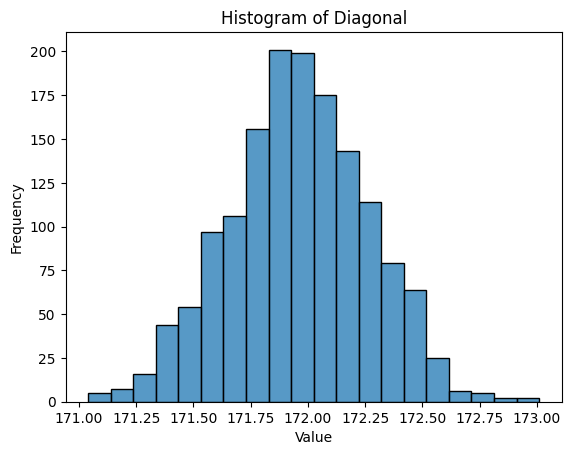

Linear Regression MSE: 0.03725300289504557
Linear Regression R-squared: 0.8395803703084163
Logistic Regression Accuracy: 0.9866666666666667
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix:
[[106   4]
 [  0 190]]


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv("fake_bills.csv")

# Displaying the first few rows of the dataset
print(data.head())

# Explore the structure of the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the data
# Example: Histogram of numerical features
sns.histplot(data['diagonal'], bins=20)
plt.title("Histogram of Diagonal")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Handle missing values (if applicable)
# Example: Impute missing values with median
data.fillna(data.median(), inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

# Encode categorical variables (if applicable)
# This step is not necessary if your dataset doesn't contain categorical variables

# Scale numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R-squared:", r2_lr)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
